In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [50]:
# Load data
book = pd.read_csv("/content/book (1).csv", encoding='latin1')


In [51]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [52]:
book.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [53]:
book.shape

(10000, 4)

In [54]:
book.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   10000 non-null  bool 
 1   User.ID      10000 non-null  bool 
 2   Book.Title   10000 non-null  bool 
 3   Book.Rating  10000 non-null  bool 
dtypes: bool(4)
memory usage: 39.2 KB


In [55]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [56]:
books=book.iloc[:,1:]
books

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [57]:
# Renaming columns
books = book.rename({'User.ID': 'UserId', 'Book.Title': 'Title', 'Book.Rating': 'Rating'}, axis=1)
books

,Unnamed: 0,UserId,Title,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [58]:
# Number of UserId ,Title and Ratings
books.nunique()

Unnamed: 0    10000
UserId         2182
Title          9659
Rating           10
dtype: int64

In [59]:
# Number of Ratings ad counts
books['Rating'].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: Rating, dtype: int64

In [60]:
# Data exploration
print(books.head())
print(books.columns)
print(books.shape)
print(books.isnull().sum())

   Unnamed: 0  UserId                                              Title  \
0           1  276726                                Classical Mythology   
1           2  276729                                       Clara Callan   
2           3  276729                               Decision in Normandy   
3           4  276736  Flu: The Story of the Great Influenza Pandemic...   
4           5  276737                             The Mummies of Urumchi   

   Rating  
0       5  
1       3  
2       6  
3       8  
4       6  
Index(['Unnamed: 0', 'UserId', 'Title', 'Rating'], dtype='object')
(10000, 4)
Unnamed: 0    0
UserId        0
Title         0
Rating        0
dtype: int64


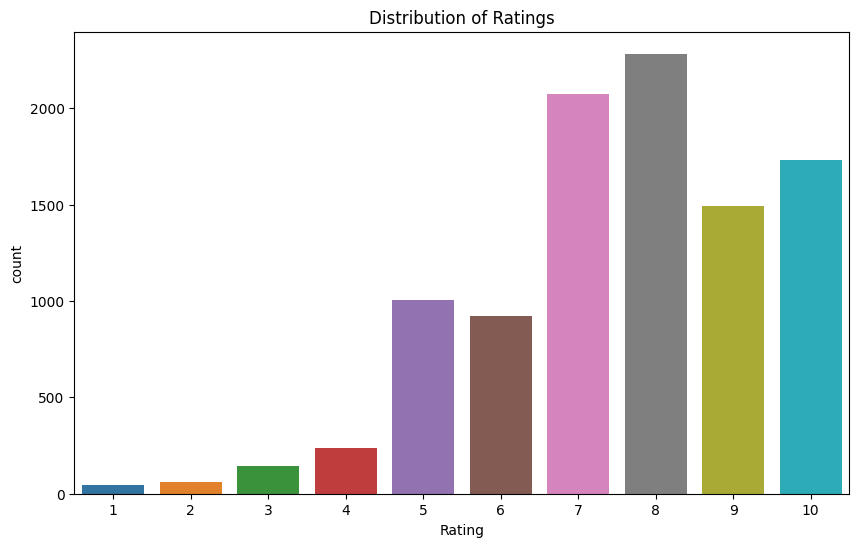

In [61]:
#Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=books)
plt.title('Distribution of Ratings')
plt.show()

In [62]:
#Create a pivot table
books_pivot=books.pivot_table(index='UserId',columns='Title',values='Rating').fillna(0)
books_pivot

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [63]:
#calculate cosin similarity between users
user_sim = 1 - pairwise_distances(books_pivot.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [64]:
#Convert similaty matrix to a dataframe
user_sim_df=pd.DataFrame(user_sim , index=books_pivot.index, columns=books_pivot.index)
user_sim_df

UserId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
UserId,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


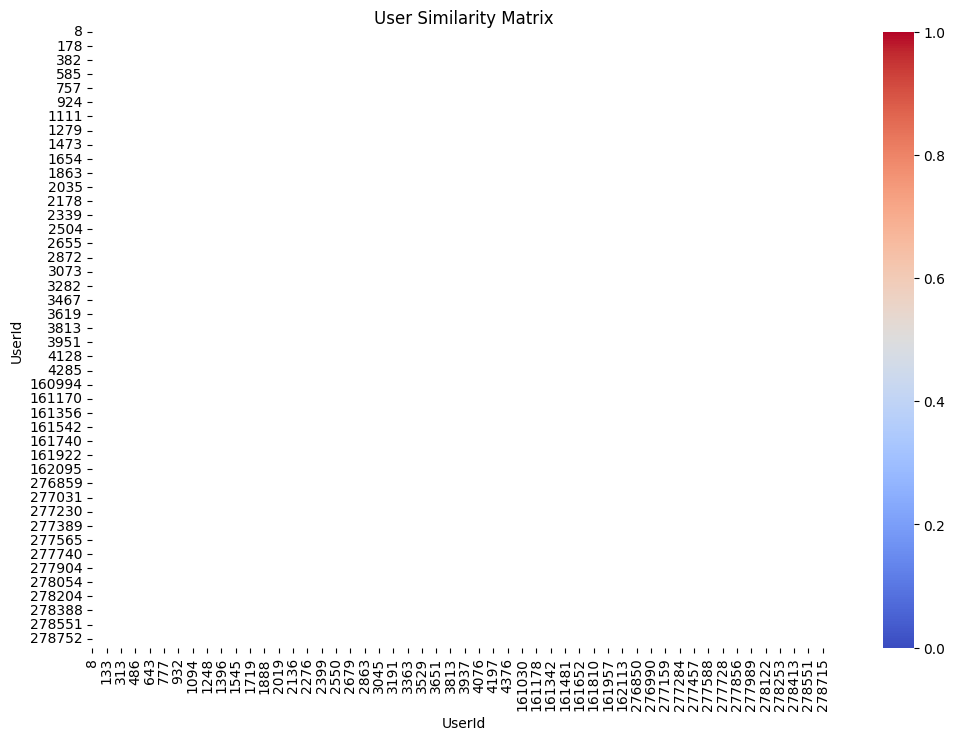

In [65]:
#visualize the similarity matrix
plt.figure(figsize=(12,8))
sns.heatmap(user_sim_df, cmap='coolwarm', linewidths=.5)
plt.title('User Similarity Matrix')
plt.show()

In [66]:
# Recommendation function
def get_recommendation(customer_id):
    # Find the top 3 similar users
    similar_users = user_sim_df[customer_id].sort_values(ascending=False).head(3).index.tolist()
    similar_users
    # Get books watched by similar users but not watched by the target user
    recommended_books = set(books[books['UserId'].isin(similar_users)]['Title']) - set(books[books['UserId'] == customer_id]['Title'])

    return recommended_books

In [67]:

# Example recommendations
recommendations_162113 = get_recommendation(162113)
recommendations_276813 = get_recommendation(276813)

In [68]:
get_recommendation(276813)


{'An Inconvenient Woman',
 'Antipodes 10',
 'Back Roads',
 'Barchester Towers (Oxford Pocket Classics)',
 'Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra',
 'Confessions of a Sociopathic Social Climber : The Katya Livingston Chronicles (Katya Livingston Chronicles (Hardcover))',
 "Cranford (The World's Classics)",
 'Diet for a Poisoned Planet: How to Choose Safe Foods for You and Your Family',
 'Early Poems (Dover Thrift Editions)',
 'Everything Is Illuminated: A Novel',
 'Going down swinging',
 'Home Spun: A Collection',
 "I Giorni Dell'abbandono",
 'In Her Shoes : A Novel',
 'Kick Ass: Selected Columns of Carl Hiaasen',
 'Last Blue: Poems',
 'Life of Pi',
 'Light a Penny Candle',
 'Like a Hole in the Head',
 'Listening Hearts: Discerning Call in Community',
 'Montessori Today: A Comprehensive Approach to Education from Birth to Adulthood',
 "Oil Painting Techniques (Artist's Painting Library)",
 'Organic Chemistry (Saunders Golden Sunburst Series)',
 'Postmortem',
 "Pun

In [69]:
get_recommendation(162113)


{'Ancient Celtic Romances',
 'Katapult (Kat Colorado Mysteries)',
 'Keepers of the Earth Teachers Guide',
 'Ransom',
 'The Art Of Celtia',
 'The Celts Activity Book',
 'The Proving',
 'The Western way: A practical guide to the Western mystery tradition',
 'Truckers',
 'Wings'}